In [2]:
from textblob import TextBlob as t
text=input("Please type the sentance that you want to sentiment analysis on :")
check=t(text)
s_value= check.sentiment.polarity
if s_value<0:
    print("your sentance has negative sentiment\n")
elif s_value==0:
    print("your sentance has neutral sentiment\n")
elif s_value>0 and s_value<=1:
    print("your sentance has positive sentiment\n")
    
    

Please type the sentance that you want to sentiment analysis on :i am bad boy
your sentance has negative sentiment



In [2]:
import tweepy
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

#keys and tokens to access twitter API
consumer_key = 'ZSl6QNMiHmV9KE1AkWZ4r7WRP'
consumer_secret = 'gtWmgmd4hVYLBVa0qxVBjbCRXjbWSMpFPEO3uW9gohjZGdSJ7S'
access_token = '1306786455415484416-3xgHyYiDreSuXtOqSluDfCSc4OQQFN'
access_token_secret = '0xlVEIJAFCNn2ZBGJkLa4rlWHkYdZET3AtwpMzqB1WvIN'

#connection to twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
                           
name=input("enter user account name which yu want to sentiment analysis on ")
c=int(input("enter how many tweets you want to retrieve"))

def pre_processing(tweet):
    # Removing '#' hash tag
    tweet = re.sub('#', '', tweet) 
    # Removing hyperlink
    tweet = re.sub('https?:\/\/\S+', '', tweet) 
     # Removing RT
    tweet = re.sub('RT[\s]+', '', tweet)
     #Removing @mentions
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
    return tweet


#Getting the tweets from given name's twitter account
tweets=api.user_timeline(screen_name=name,count=c)
positive,negative,neutral,i=0,0,0,1

for tweet in tweets:
    t=pre_processing(tweet.text) #preprocessing the tweet to remove hashtags,mentions,hyperlinks and retweets
    #finding the polarity score for each tweet
    polarity_score=TextBlob(t).sentiment.polarity
    
    
    if polarity_score<0:
        negative+=1
        print(str(i)+': '+ tweet.text+'\n')
        print("Negative Sentiment\n")
    elif polarity_score==0:
        print(str(i)+': '+ tweet.text+'\n')
        print("neutral Sentiment\n")
        neutral+=1
    else:
        print(str(i)+': '+ tweet.text+'\n')
        print("positive Sentiment\n")
        positive+=1
    i+=1






    

enter user account name which yu want to sentiment analysis on elonmusk
enter how many tweets you want to retrieve100
1: @PPathole @thesheetztweetz Well-optimized Starship would do ~250 tons to orbit as expendable &amp; ~150 tons fully reusable

neutral Sentiment

2: @jhong @sama Nods

neutral Sentiment

3: @wintonARK The day FSD goes to wide release will be one of the biggest asset value increases in history

Negative Sentiment

4: @thesheetztweetz Full &amp; rapid reusability is the holy grail of orbital rocketry

positive Sentiment

5: @justindross Most big companies in tech have turned into places where talent goes to die

positive Sentiment

6: @MatchasmMatt @NHTSAgov Objectively, her track record is extremely biased against Tesla

Negative Sentiment

7: @thesheetztweetz cgi irl

neutral Sentiment

8: @WR4NYGov @POTUS Odd

Negative Sentiment

9: @adamhoov They’re required by law, but designed to be easy to remove by owners

positive Sentiment

10: @SpaceXMR 🤣

neutral Sentiment

1

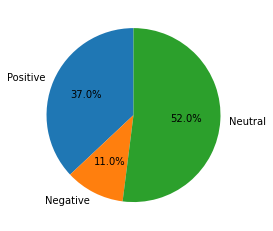

In [3]:
#plotting data inform of pie chart
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


plt.show()